In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import IPython.display
import networkx as nx
import matplotlib
def draw_clubs(clubs, threshold,G): 
    pos = nx.spring_layout(G) 
    plt.title('threshold=%.2f' % threshold) 
    nx.draw(G, pos=pos) 
    for club in clubs:
        nx.draw(G, pos=pos ,nodelist=club, node_color=rand_color(),with_labels=True)
    plt.show()
def rand_color():#生成随机颜色
    re=hex(np.random.randint(0,0xffffff))
    re=re.replace("0x","000000")
    return "#"+re[-6:]


In [ ]:
G = nx.read_gml('karate/karate.gml', label = 'id')
nx.draw(G,with_labels = True, font_weight = 'bold')

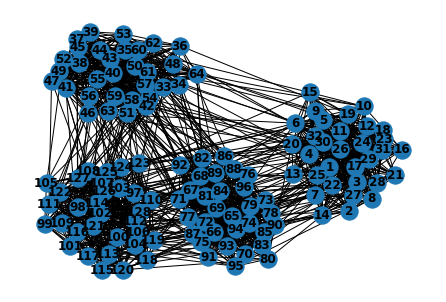

In [2]:
def readfile(filename):
    G=nx.Graph()
    f=open(filename)
    for line in f.readlines():
        edge=[int(i.strip()) for i in line.split(" ")]
        G.add_edge(*edge)
    return G

G=readfile("data1.txt")
nx.draw(G,with_labels = True, font_weight = 'bold')

In [3]:
%%time
N = {i:set(G[i]) for i in G }
S = np.zeros( ( G.number_of_nodes(), G.number_of_nodes() ) )
for i in G:
    for j in G:
        S[i-1, j-1] = len(N[i] & N[j]) / len(N[i] | N[j])
        
print(S)#相似度矩阵

[[1.         0.40625    0.37142857 ... 0.04081633 0.02040816 0.04      ]
 [0.40625    1.         0.36363636 ... 0.06666667 0.04444444 0.06521739]
 [0.37142857 0.36363636 1.         ... 0.04081633 0.02040816 0.04      ]
 ...
 [0.04081633 0.06666667 0.04081633 ... 1.         0.43243243 0.41025641]
 [0.02040816 0.04444444 0.02040816 ... 0.43243243 1.         0.35      ]
 [0.04       0.06521739 0.04       ... 0.41025641 0.35       1.        ]]
Wall time: 45 ms


In [4]:
def Density(V):
    if len(V) == 1:
        return 1.0
    
    density = 0.0
    for i in V:
        for j in V:
            if i != j:
                density +=S[i-1,j-1]
    density /= len(V) **2 - len(V)            
    return density

print(Density(list(G.nodes)))

0.12791482159097492


In [7]:
%%time
def generate_club(threshold,G):
    clubs =[]#club的集合
    V = list(G.nodes)
    club_now =[]#程序进行时操作的club

    while(len(V) > 0):
        if len(club_now) == 0:
            tmp = V[np.random.randint(0, len(V))] 
            club_now.append(tmp)
            den_now = Density(club_now) 
            V.remove(tmp)

        id_max=-1#使得密度降低最小的id,即加入后密度最大的id
        den_max=-np.inf

        for id in V:
            club_tmp = club_now + [id]
            den_tmp = Density(club_tmp)
            if den_tmp>den_max:
                den_max=den_tmp
                id_max=id

        if den_max < threshold:
            clubs.append(club_now)
            club_now = []
        else:
            V.remove(id_max) 
            club_now.append(id_max)       

            if(len(V) == 0):
                clubs.append(club_now)
    
    return clubs

for threshold in [0,0.25,0.5,1]:
    clubs=generate_club(threshold,G)
    print(clubs)

[[83, 70, 68, 72, 66, 74, 81, 80, 73, 69, 87, 75, 85, 92, 78, 79, 96, 76, 77, 65, 93, 95, 86, 67, 82, 91, 94, 90, 84, 71, 88, 89, 119, 120, 121, 98, 112, 116, 102, 100, 101, 113, 117, 104, 106, 107, 114, 127, 128, 99, 110, 111, 126, 109, 118, 125, 122, 97, 115, 123, 124, 105, 103, 108, 51, 58, 63, 55, 33, 59, 56, 53, 37, 40, 50, 61, 44, 49, 52, 48, 47, 41, 45, 54, 62, 60, 38, 43, 39, 34, 57, 64, 42, 35, 46, 36, 25, 22, 6, 7, 20, 32, 4, 29, 8, 19, 31, 12, 30, 18, 17, 3, 28, 1, 9, 11, 14, 16, 24, 23, 10, 26, 13, 2, 27, 21, 5, 15]]
[[116, 121, 99, 128, 113, 106, 117, 100, 119, 110, 102, 101, 125, 112, 120, 126, 109, 127, 111, 104, 114, 122, 98, 123, 107, 118, 124, 115, 105, 97, 108, 103, 46, 41, 49, 54, 38, 60, 51, 47, 44, 52, 33, 56, 37, 39], [10, 26, 31, 4, 23, 11, 7, 19, 29, 30, 8, 32, 17, 20, 18, 6, 22, 12, 25, 1, 28, 16, 9, 24, 3, 14, 27, 21, 13, 2, 15, 5, 90, 73, 95, 96, 83, 78, 87, 75, 66, 74, 81, 80, 85, 69, 65], [84, 79, 72, 70, 82, 91, 68, 92, 86, 93, 77, 67, 76, 94, 88, 71, 89,

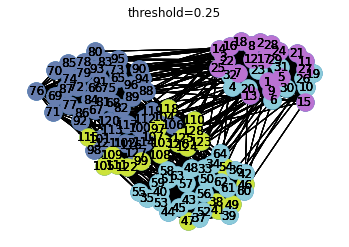

In [10]:
threshold=0.25
clubs_show=generate_club(threshold,G)
draw_clubs(clubs_show,threshold,G)
#展示用